# SDS Kaggle salary estimation project - 2025
### Data transformation and exploration
source: https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/data

###  Data summary

peter-eda-clean:
- 2 col del : ['salary','salary_currency']   (16494, 11) -> (16494, 9)
- duplicates dropped: (16494, 9) -> (10092, 9)
- change column order: salary_in_usd at the end

here:

- <a href='#year'>work_year</a>: old years has significantly lower average than 2022. data before 2022 deleted. (10092, 9) -> (9801, 8)  
- change datatype for <a href='#remote'>remote_ratio</a> from int -> object
- <a href='#loc'>location</a>, <a href='#job'>job title</a>, <a href="#res">residence</a> has myriads of values. Low represented values were merged. Variation was reduced by recategorisation by descriptive statistics using KMeans.
  
  <u>Location</u>: sample merge, new name 'other': below 25 datapoint, 70 -> 9 (61 merged, 339 datapoint)  
  Reduction: 10 -> 5  
  new categories:  
                0        [AU, CA]  
                1    [ES, IN, NL]  
                2         [other]  
                3    [DE, FR, GB]  
                4            [US]  
  <u>Job title</u>: sample merge, new name 'other': below 5 datapoint, 150 -> 90 (61 merged, 129 datapoint)
  new categories: 10  
  <u>Employee residence</u>: sample merge, new name'other': below 11 datapoint, 80 -> 23 (58 merged, 169 datapoint)  
  new categories: 7  
    0             [DE, FR, GB, PL, UA, other]  
    1                                [CA, US]  
    2    [AR, BR, ES, IN, IT, LT, LV, PT, ZA]  
    3                                [AU, EG]  
    4                                    [MX]  
    5                                    [IE]  
    6                                [CO, NL]  
  
- the <a href='#emp'>rest of the feature columns</a> remain
- target <a href='#sal'>salary_in_usd</a> log transformed

other (underrepresented job titles): 'Machine Learning Research Engineer', 'Computational Biologist',
       'Data Science Analyst', 'Data Operations Manager',
       'Financial Data Analyst', 'Data Integration Developer',
       'Admin & Data Analyst', 'Data Visualization Engineer',
       'Data Strategy Manager', 'Principal Data Scientist',
       'Software Data Engineer', 'Principal Machine Learning Engineer',
       'Machine Learning Manager', 'Data DevOps Engineer', 'ETL Engineer',
       'Lead Data Analyst', 'AI Product Manager', 'AI Research Scientist',
       'Applied Machine Learning Engineer', 'Data Visualization Analyst',
       'Computer Vision Software Engineer', 'Data Analyst Lead',
       'ML Ops Engineer', 'Machine Learning Modeler', 'Bear Robotics',
       'Data Pipeline Engineer', 'Director of Business Intelligence',
       'Data Analytics Engineer', 'Data Scientist Lead', 'Data Modeller',
       'Business Intelligence Data Analyst', 'Finance Data Analyst',
       'Compliance Data Analyst', 'Cloud Data Engineer',
       'Data Reporting Analyst', 'Machine Learning Specialist',
       'Data Management Consultant', 'Manager Data Management',
       'Consultant Data Engineer', 'Data Science Tech Lead',
       'Azure Data Engineer', 'Deep Learning Researcher', 'Big Data Architect',
       'Autonomous Vehicle Technician', 'BI Data Engineer',
       'AWS Data Architect', 'Staff Data Analyst',
       'Quantitative Research Analyst', 'Big Data Developer',
       'Principal Data Architect', 'Marketing Data Analyst',
       'Marketing Data Scientist', 'Managing Director Data Science',
       'CRM Data Analyst', 'Principal Data Engineer', 'Power BI Developer',
       'Data Analytics Associate', 'Applied Research Scientist',
       'Analytics Engineering Manager', 'Lead Data Engineer',
       'Principal Data Analyst'


In [133]:
print('Job title categories:')
for i in range(10):
    print('category {}: '.format(i), (job_agg.reset_index().groupby('new_cat')['job_title'].apply(list))[i], '\n')

Job title categories:
category 0:  ['AI Developer', 'AI Scientist', 'Applied Data Scientist', 'Business Intelligence Engineer', 'Data Analytics Manager', 'Data Product Owner', 'Data Quality Engineer', 'MLOps Engineer', 'NLP Engineer', 'other'] 

category 1:  ['Analytics Engineer', 'Machine Learning Engineer', 'Machine Learning Scientist', 'Prompt Engineer', 'Research Engineer', 'Research Scientist'] 

category 2:  ['Business Intelligence', 'Business Intelligence Manager', 'Business Intelligence Specialist', 'Cloud Database Engineer', 'Data Integration Engineer', 'Data Management Specialist', 'Data Modeler', 'Data Operations Engineer', 'Data Product Manager', 'Data Science Engineer', 'Data Science Lead', 'Data Science Practitioner', 'Data Strategist', 'ETL Developer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Operations Engineer', 'Machine Learning Researcher', 'Robotics Engineer'] 

category 3:  ['AI Engineer', 'Applied Scientist', 'Computer Vision Engineer', 'Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

def t_test(alpha=0.05, **kwargs: 'a:[name, data]'):
    """ indepented t-test, for two means or data series
        a: data to compare to,
        b: data

        alpha: threshold of significance
        H0: a=b 
    ===========
    return (t_score, p_value)
    """

    tscore,  p_value = ttest_ind(kwargs['a'][1], kwargs['b'][1])

   
    print("""The difference between {x} and {y} is {s} 
    with p-value of {p} (t-score: {t})""".format(x=kwargs['a'][0],
                                                 y=kwargs['b'][0], 
                                                 s='significant' if p_value < alpha else 'NOT significant',
                                                 p=p_value,
                                                 t=tscore))
   
        


In [2]:
sns.set_style('darkgrid')

In [85]:
df = pd.read_csv('salary_clean.csv', index_col=[0])
df.shape

(10092, 9)

In [4]:
df[:3]

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2024,MI,FT,Data Scientist,AU,0,AU,S,120000
1,2024,MI,FT,Data Scientist,AU,0,AU,S,70000
2,2024,MI,CT,Data Scientist,US,0,US,M,130000


<span id='year' style='font-weight: bold'>What's the business with time?</span>

In [3]:
# check salary change over time
df.work_year.value_counts()

work_year
2023    4632
2024    4053
2022    1116
2021     216
2020      75
Name: count, dtype: int64

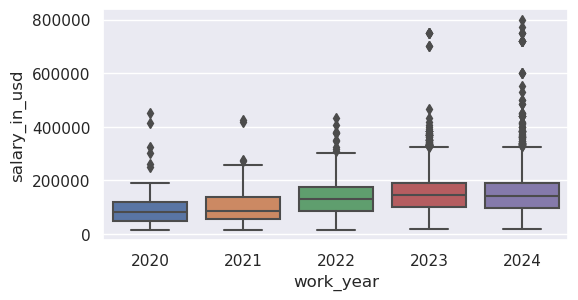

In [4]:
sns.set_theme(rc={'figure.figsize': (6,3)})
sns.boxplot(data=df, x='work_year', y='salary_in_usd');

In [5]:
y21 = df.loc[df.work_year == 2021, 'salary_in_usd']
y22 = df.loc[df.work_year == 2022, 'salary_in_usd']

t_test(a=['year21', y21], b=['year22', y22])

The difference between year21 and year22 is significant 
    with p-value of 6.7643836395553875e-12 (t-score: -6.925067332604848)


In [86]:
df = df.loc[df.work_year > 2021]
df.shape

(9801, 9)

In [87]:
df.drop('work_year', axis=1, inplace=True)
df.shape

(9801, 8)

In [88]:
#df.to_csv('temp_year.csv', index=False)

<span id='remote' style='font-weight:bold'>Checking data types - change</span>

In [90]:
#df = pd.read_csv('temp_year.csv')
print(df.shape)
df[:3]

(9801, 8)


,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,MI,FT,Data Scientist,AU,0,AU,S,120000
1,MI,FT,Data Scientist,AU,0,AU,S,70000
2,MI,CT,Data Scientist,US,0,US,M,130000


In [30]:
df.dtypes

experience_level      object
employment_type       object
job_title             object
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
salary_in_usd          int64
dtype: object

In [91]:
df['remote_ratio'] = df.remote_ratio.astype('object')

<span style='font-weight:bold'>Check feature value distribution</spen>

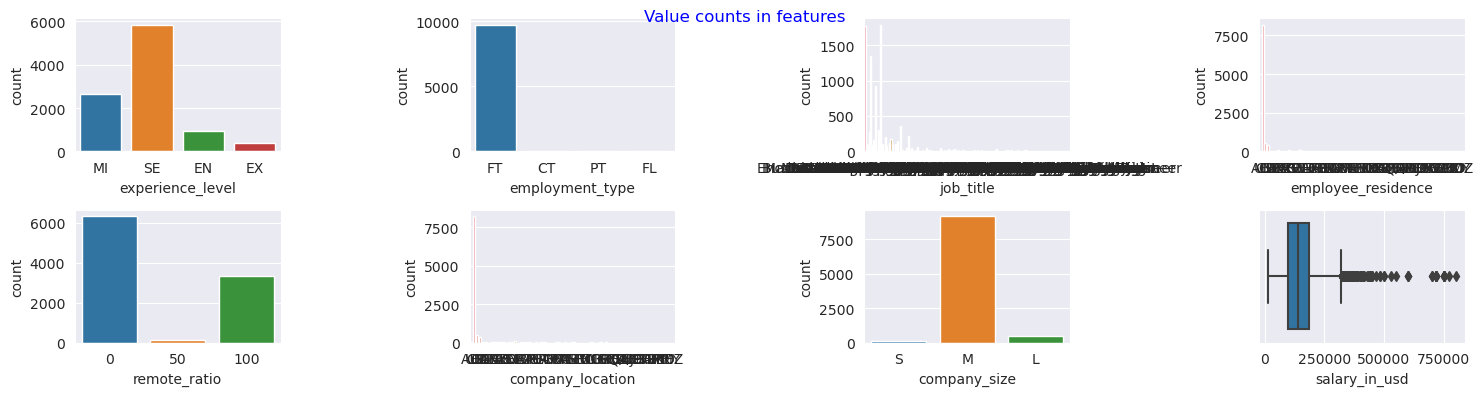

In [92]:
fig, axes = plt.subplots(2,4, figsize=(15,4))
axes = axes.flat

for c, ax in zip(df.columns[:-1], axes[:-1]):
    sns.countplot(data=df, x=c, ax=ax)

sns.boxplot(data=df, x='salary_in_usd', ax=axes[7])

plt.tight_layout()
plt.suptitle('Value counts in features', size=12, c='blue')
plt.show()

In [93]:
print('location',df.company_location.value_counts().values,'\n',
'job',df.job_title.value_counts().values, '\n',
'residence',df.employee_residence.value_counts().values)

location [8226  522  390   81   67   51   50   46   29   25   20   20   17   16
   14   13   12   12   11   11   10   10    9    9    9    9    7    6
    6    5    5    4    4    4    4    3    3    3    3    3    3    3
    3    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    1    1    1    1    1    1    1    1    1    1    1] 
 job [1790 1774 1354  923  354  306  278  218  206  172  165  140  113  110
  106  105  103   94   85   75   63   50   47   45   43   40   36   31
   30   27   26   25   24   23   23   23   23   23   23   22   22   20
   20   20   20   19   19   18   17   16   16   15   15   14   14   14
   13   12   12   12   12   11   11   11   10   10   10   10    9    8
    8    8    8    8    8    8    7    7    7    7    6    6    6    5
    5    5    5    5    5    4    4    4    4    4    4    4    4    4
    4    3    3    3    3    3    3    3    3    3    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2 

<span id='loc' style='font-weight: bold'>Fixing location: low sample size merge, Variation reduction</span>

In [94]:
#'location',
loc_low = df.company_location.value_counts().loc[df.company_location.value_counts() < 26]
loc_low.size,loc_low.sum(),df.company_location.unique().size

(61, 339, 70)

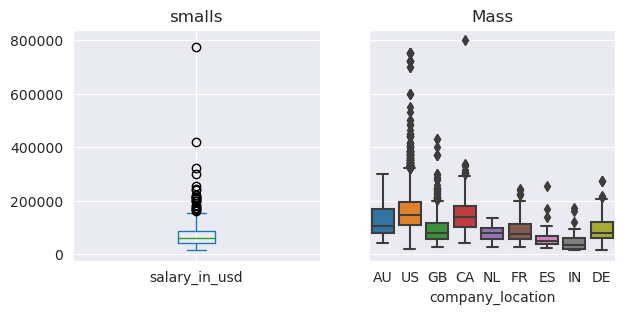

In [95]:
fig, ax = plt.subplots(1,2, figsize=(7,3), sharey=True)
df.loc[df.company_location.isin(loc_low.index)].plot(kind='box',ax=ax[0], title='smalls')
sns.boxplot(data=df.loc[~df.company_location.isin(loc_low.index)], x='company_location',y='salary_in_usd', ax=ax[1]).set_title('Mass')
plt.show()

In [96]:
df['company_location'] = df.company_location.apply(lambda x: 'other' if x in loc_low.index else x)

In [97]:
df.company_location.value_counts()

company_location
US       8226
GB        522
CA        390
other     339
DE         81
ES         67
AU         51
FR         50
IN         46
NL         29
Name: count, dtype: int64

In [98]:
loc_agg = df.groupby('company_location').agg({'salary_in_usd': ['mean','min','max','std','quantile']})
loc_agg

salary_in_usd                                       
                           mean    min     max           std  quantile
company_location                                                      
AU                127265.921569  40000  300000  69656.576914  105000.0
CA                145047.541026  40747  800000  67521.489800  138250.0
DE                 98655.962963  16666  275000  58526.068228   77777.0
ES                 59314.895522  21593  253750  35466.931243   48585.0
FR                 96950.640000  28368  244400  59273.964260   74561.5
GB                 96732.603448  26992  430967  59922.885445   80036.0
IN                 45979.717391  15809  172700  36157.766735   35305.0
NL                 78178.827586  25000  134960  30698.621279   77777.0
US                156912.304158  20000  750000  69714.431547  147384.0
other              75029.817109  15000  774000  63961.479799   60000.0

In [99]:
locpipe = Pipeline([('scaler', StandardScaler()),
               ('kmeans', KMeans(n_clusters=5))], verbose=False)

In [100]:
inertia = []
for n in range(3,11):
    locpipe.set_params(kmeans__n_clusters=n)
    locpipe.fit_transform(loc_agg)
    inertia.append(locpipe.named_steps['kmeans'].inertia_)

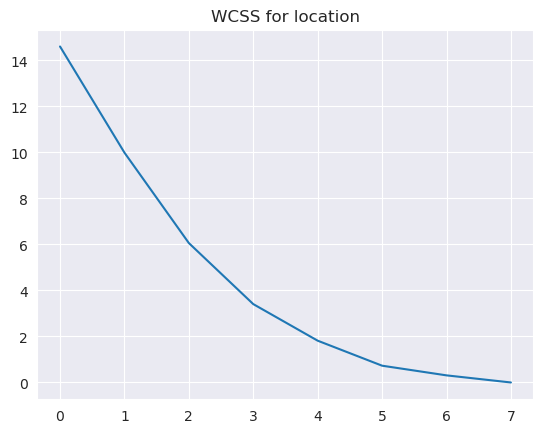

In [101]:
sns.lineplot(inertia).set_title('WCSS for location');

In [102]:
inertia

[14.602927460727926,
 9.990278657343339,
 6.0593729376929435,
 3.40628816772106,
 1.8162745123291528,
 0.7295052989839842,
 0.3090770539015355,
 0.0]

In [103]:
np.array(inertia[:-1]) - np.array(inertia[1:])

array([4.6126488 , 3.93090572, 2.65308477, 1.59001366, 1.08676921,
       0.42042825, 0.30907705])

In [104]:
locpipe.set_params(kmeans__n_clusters=5)
locpipe.fit_transform(loc_agg)

array([[1.15175622e+00, 4.13115235e+00, 3.98697969e+00, 2.28540726e+00,
        3.27239959e+00],
       [1.15175622e+00, 5.36064325e+00, 4.24064774e+00, 3.57900572e+00,
        2.40466882e+00],
       [3.43191690e+00, 2.22319183e+00, 2.23105630e+00, 8.51183182e-01,
        3.38304646e+00],
       [4.57119111e+00, 3.40664272e-01, 3.04038094e+00, 2.20225074e+00,
        5.11937771e+00],
       [2.64397726e+00, 2.31046179e+00, 2.74897893e+00, 5.80175577e-01,
        3.62934805e+00],
       [2.38665083e+00, 2.52480434e+00, 2.14125472e+00, 5.78558344e-01,
        3.11525937e+00],
       [5.33734705e+00, 9.13444389e-01, 3.30183483e+00, 2.75284044e+00,
        5.68756119e+00],
       [4.16558840e+00, 1.02956744e+00, 3.68795389e+00, 2.20045663e+00,
        4.82957531e+00],
       [2.63039412e+00, 5.15980413e+00, 3.56637497e+00, 3.31291238e+00,
        4.21468485e-08],
       [3.95132987e+00, 3.25251654e+00, 0.00000000e+00, 2.28936839e+00,
        3.56637497e+00]])

In [105]:
locpipe.named_steps['kmeans'].inertia_

6.0593729376929435

In [106]:
locpipe.named_steps['kmeans'].labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 4, 2], dtype=int32)

In [107]:
loc_agg['new_cat'] = locpipe.named_steps['kmeans'].labels_
loc_agg

salary_in_usd                                        new_cat
                           mean    min     max           std  quantile        
company_location                                                              
AU                127265.921569  40000  300000  69656.576914  105000.0       0
CA                145047.541026  40747  800000  67521.489800  138250.0       0
DE                 98655.962963  16666  275000  58526.068228   77777.0       3
ES                 59314.895522  21593  253750  35466.931243   48585.0       1
FR                 96950.640000  28368  244400  59273.964260   74561.5       3
GB                 96732.603448  26992  430967  59922.885445   80036.0       3
IN                 45979.717391  15809  172700  36157.766735   35305.0       1
NL                 78178.827586  25000  134960  30698.621279   77777.0       1
US                156912.304158  20000  750000  69714.431547  147384.0       4
other              75029.817109  15000  774000  63961.479799   60000.0       2

In [108]:
loc_agg.reset_index().groupby('new_cat')['company_location'].apply(list)

new_cat
0        [AU, CA]
1    [ES, IN, NL]
2         [other]
3    [DE, FR, GB]
4            [US]
Name: company_location, dtype: object

In [109]:
filter = {k:v for k,v in zip(loc_agg.index, loc_agg.new_cat)}

In [110]:
filter

{'AU': 0,
 'CA': 0,
 'DE': 3,
 'ES': 1,
 'FR': 3,
 'GB': 3,
 'IN': 1,
 'NL': 1,
 'US': 4,
 'other': 2}

In [111]:
df.company_location = df.company_location.map(filter)

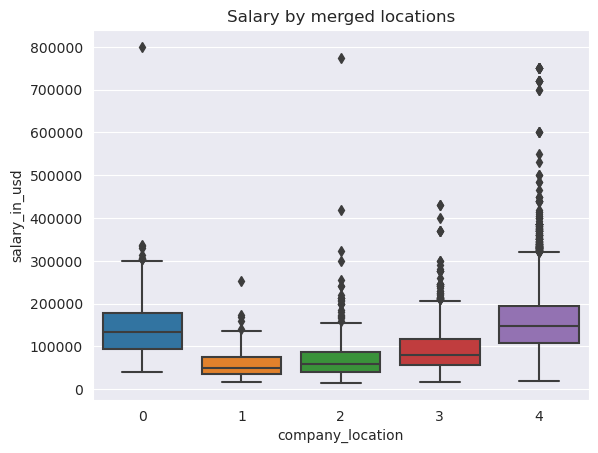

In [112]:
sns.boxplot(df, x='company_location', y='salary_in_usd').set_title('Salary by merged locations');

In [113]:
#df.to_csv('temp_loc.csv', index=False)

<span id='job' style='font-weight:bold'>Job title</span>

In [6]:
#df = pd.read_csv('temp_loc.csv')
df[:3]

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,MI,FT,Data Scientist,AU,0,0,S,120000
1,MI,FT,Data Scientist,AU,0,0,S,70000
2,MI,CT,Data Scientist,US,0,4,M,130000


In [7]:
job_low = df.job_title.value_counts().loc[df.job_title.value_counts() < 5]
job_low.size,job_low.sum(),df.job_title.unique().size

(61, 129, 150)

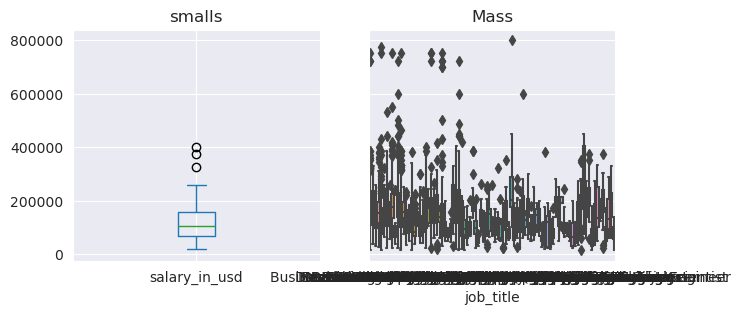

In [116]:
fig, ax = plt.subplots(1,2, figsize=(7,3), sharey=True)
df.loc[df.job_title.isin(job_low.index), 'salary_in_usd'].plot(kind='box',ax=ax[0], title='smalls')
sns.boxplot(data=df.loc[~df.job_title.isin(job_low.index)], x='job_title',y='salary_in_usd', ax=ax[1]).set_title('Mass')
plt.show()

In [9]:
df['job_title'] = df.job_title.apply(lambda x: 'other' if x in job_low.index else x)

In [10]:
df.job_title.value_counts()

job_title
Data Engineer                     1790
Data Scientist                    1774
Data Analyst                      1354
Machine Learning Engineer          923
Analytics Engineer                 354
                                  ... 
Data Quality Engineer                5
Lead Machine Learning Engineer       5
Data Science Director                5
Big Data Engineer                    5
Product Data Analyst                 5
Name: count, Length: 90, dtype: int64

In [119]:
job_agg = df.groupby('job_title').agg({'salary_in_usd': ['mean','min','max','std','quantile']})
job_agg

salary_in_usd                                 \
                                     mean     min     max            std   
job_title                                                                  
AI Architect                248782.000000   99750  800000  144166.785127   
AI Developer                135466.789474   33333  275000   75070.869938   
AI Engineer                 165578.766990   21593  400000   82043.929331   
AI Programmer                62042.000000   30000  120000   30466.643153   
AI Research Engineer         82963.000000   24322  200000   67704.744573   
...                                   ...     ...     ...            ...   
Research Engineer           181941.697248   16455  720000   95903.426151   
Research Scientist          190691.094771   23000  720000   85135.730888   
Robotics Engineer           140416.666667   65000  240000   53798.374990   
Robotics Software Engineer  196625.000000  138000  282000   47016.524451   
other                       119274.945736   18000  399880   67984.280876   

                                      
                            quantile  
job_title                             
AI Architect                204000.0  
AI Developer                124000.0  
AI Engineer                 166000.0  
AI Programmer                60207.0  
AI Research Engineer         63333.0  
...                              ...  
Research Engineer           165500.0  
Research Scientist          175000.0  
Robotics Engineer           151000.0  
Robotics Software Engineer  193000.0  
other                       105267.0  

[90 rows x 5 columns]

In [120]:
jobpipe = Pipeline([('scaler', StandardScaler()),
               ('kmeans', KMeans(n_clusters=5))], verbose=False)

In [121]:
inertia = []
for n in range(3,20):
    jobpipe.set_params(kmeans__n_clusters=n)
    jobpipe.fit_transform(job_agg)
    inertia.append(jobpipe.named_steps['kmeans'].inertia_)

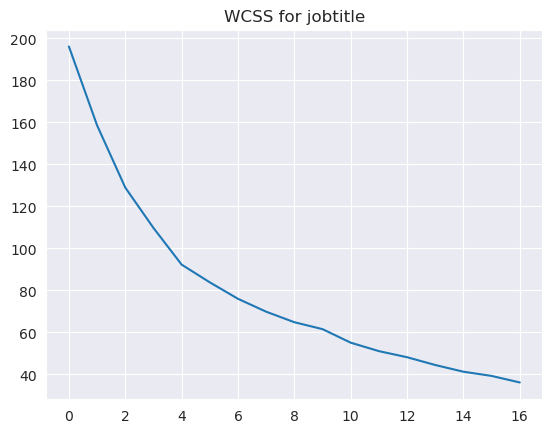

In [122]:
sns.lineplot(inertia).set_title('WCSS for jobtitle');

In [123]:
list(inertia)

[196.1413354624569,
 158.59791864649318,
 128.9722561139035,
 109.77139736305958,
 92.296626014977,
 83.84742422003497,
 76.01210249694056,
 69.87346896676625,
 64.86666614022829,
 61.56890210358098,
 55.12422905629144,
 51.10175002946694,
 48.20252880451444,
 44.49274136198107,
 41.29814791226801,
 39.29887700190514,
 36.17720094922289]

In [124]:
np.array(inertia[:-1]) - np.array(inertia[1:])

array([37.54341682, 29.62566253, 19.20085875, 17.47477135,  8.44920179,
        7.83532172,  6.13863353,  5.00680283,  3.29776404,  6.44467305,
        4.02247903,  2.89922122,  3.70978744,  3.19459345,  1.99927091,
        3.12167605])

In [ ]:
jobpipe.set_params(kmeans__n_clusters=10)
jobpipe.fit_transform(job_agg)

In [126]:
jobpipe.named_steps['kmeans'].inertia_

70.22904273718676

In [127]:
jobpipe.named_steps['kmeans'].labels_

array([8, 0, 3, 4, 5, 0, 6, 1, 0, 5, 3, 5, 4, 5, 5, 5, 2, 5, 5, 0, 6, 2,
       2, 2, 3, 9, 4, 3, 0, 4, 3, 4, 9, 6, 2, 5, 3, 4, 2, 5, 2, 4, 4, 2,
       5, 2, 0, 4, 0, 5, 3, 5, 6, 2, 2, 3, 2, 9, 5, 2, 5, 6, 3, 3, 2, 4,
       3, 3, 7, 4, 5, 4, 3, 0, 5, 1, 2, 2, 2, 1, 3, 0, 5, 1, 5, 1, 1, 2,
       6, 0], dtype=int32)

In [128]:
job_agg['new_cat'] = jobpipe.named_steps['kmeans'].labels_
job_agg

salary_in_usd                                 \
                                     mean     min     max            std   
job_title                                                                  
AI Architect                248782.000000   99750  800000  144166.785127   
AI Developer                135466.789474   33333  275000   75070.869938   
AI Engineer                 165578.766990   21593  400000   82043.929331   
AI Programmer                62042.000000   30000  120000   30466.643153   
AI Research Engineer         82963.000000   24322  200000   67704.744573   
...                                   ...     ...     ...            ...   
Research Engineer           181941.697248   16455  720000   95903.426151   
Research Scientist          190691.094771   23000  720000   85135.730888   
Robotics Engineer           140416.666667   65000  240000   53798.374990   
Robotics Software Engineer  196625.000000  138000  282000   47016.524451   
other                       119274.945736   18000  399880   67984.280876   

                                     new_cat  
                            quantile          
job_title                                     
AI Architect                204000.0       8  
AI Developer                124000.0       0  
AI Engineer                 166000.0       3  
AI Programmer                60207.0       4  
AI Research Engineer         63333.0       5  
...                              ...     ...  
Research Engineer           165500.0       1  
Research Scientist          175000.0       1  
Robotics Engineer           151000.0       2  
Robotics Software Engineer  193000.0       6  
other                       105267.0       0  

[90 rows x 6 columns]

In [129]:
filter = {k:v for k,v in zip(job_agg.index, job_agg.new_cat)}

In [130]:
df.job_title = df.job_title.map(filter)

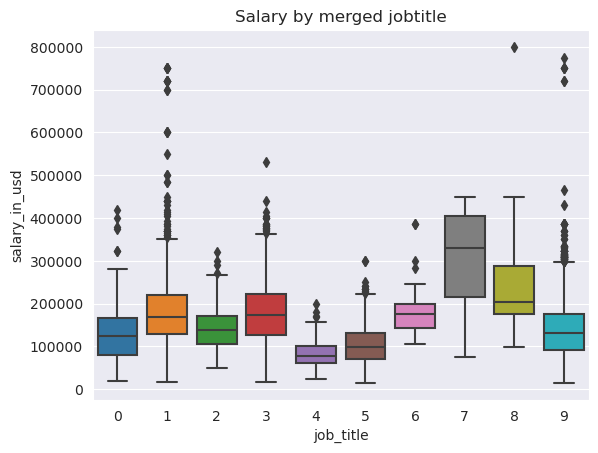

In [131]:
sns.boxplot(df, x='job_title', y='salary_in_usd').set_title('Salary by merged jobtitle');

In [132]:
#df.to_csv('temp_job.csv', index=False)

<span id='res' style='font-weight: bold'>fixing employee residence</span>

In [134]:
#df = pd.read_csv('temp_job.csv')
print(df.shape)
df[:3]

(9801, 8)


,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,MI,FT,9,AU,0,0,S,120000
1,MI,FT,9,AU,0,0,S,70000
2,MI,CT,9,US,0,4,M,130000


In [135]:
df.employee_residence.value_counts().values

array([8190,  517,  391,   75,   70,   58,   52,   48,   28,   26,   21,
         20,   17,   17,   16,   13,   13,   13,   12,   12,   12,   11,
         10,   10,    9,    8,    8,    7,    7,    6,    5,    5,    5,
          4,    4,    4,    4,    3,    3,    3,    3,    3,    3,    3,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1])

In [136]:
res_low = df.employee_residence.value_counts().loc[df.employee_residence.value_counts() < 11]
res_low.size,res_low.sum(),df.employee_residence.unique().size

(58, 169, 80)

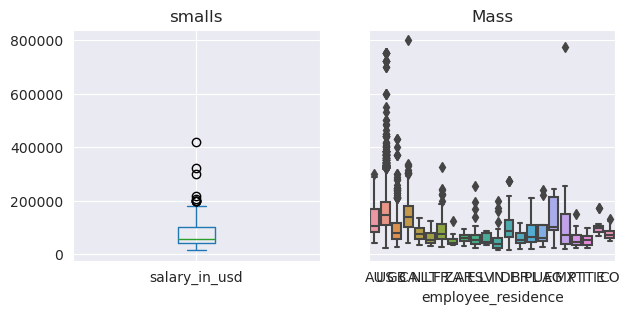

In [137]:
fig, ax = plt.subplots(1,2, figsize=(7,3), sharey=True)
df.loc[df.employee_residence.isin(res_low.index), 'salary_in_usd'].plot(kind='box',ax=ax[0], title='smalls')
sns.boxplot(data=df.loc[~df.employee_residence.isin(res_low.index)], x='employee_residence',y='salary_in_usd', ax=ax[1]).set_title('Mass')
plt.show()

In [138]:
df['employee_residence'] = df.employee_residence.apply(lambda x: 'other' if x in res_low.index else x)
df.employee_residence.value_counts()

employee_residence
US       8190
GB        517
CA        391
other     169
DE         75
ES         70
IN         58
FR         52
AU         48
NL         28
PT         26
BR         21
LT         20
IT         17
ZA         17
LV         16
AR         13
MX         13
CO         13
PL         12
EG         12
IE         12
UA         11
Name: count, dtype: int64

In [139]:
res_agg = df.groupby('employee_residence').agg({'salary_in_usd': ['mean','min','max','std','quantile']})
res_agg

salary_in_usd                                        
                             mean    min     max            std  quantile
employee_residence                                                       
AR                   58461.538462  30000   92000   19526.116633   60000.0
AU                  129733.270833  40000  300000   69510.162748  105600.0
BR                   60122.476190  19910  115000   27477.643850   54000.0
CA                  145165.107417  40747  800000   67246.985956  138000.0
CO                   78846.153846  48000  131000   24942.754973   72000.0
DE                  104474.453333  16666  275000   58230.655620   86374.0
EG                  133000.000000  22800  242000   71884.098634   99750.0
ES                   61843.228571  21593  253750   38467.093711   51128.0
FR                   99192.673077  28368  323905   66419.247836   74561.5
GB                   97094.887814  28299  430967   60060.821768   80041.0
IE                  104694.916667  68293  172309   33896.783252   98585.5
IN                   49823.689655  15809  200000   38878.171236   37318.5
IT                   53283.588235  24165   97712   20180.757097   53984.0
LT                   61942.350000  28666  125333   29630.996479   51999.5
LV                   57059.687500  34666   86666   20160.276207   46799.5
MX                  141930.615385  17598  774000  202322.425232   72000.0
NL                   78516.357143  32390  134960   29664.804546   76677.0
PL                   81870.333333  18160  209000   55776.004923   65723.5
PT                   54918.576923  21013  150000   29958.700758   45886.0
UA                   98272.727273  25000  240000   71246.180121   60000.0
US                  157203.860440  24000  750000   69592.858923  147500.0
ZA                   52430.058824  32177  124935   22845.678438   42457.0
other                74933.142012  15000  417937   58406.827709   56536.0

In [140]:
respipe = Pipeline([('scaler', StandardScaler()),
               ('kmeans', KMeans(n_clusters=5))], verbose=False)

In [141]:
inertia = []
for n in range(3,10):
    respipe.set_params(kmeans__n_clusters=n)
    respipe.fit_transform(res_agg)
    inertia.append(respipe.named_steps['kmeans'].inertia_)

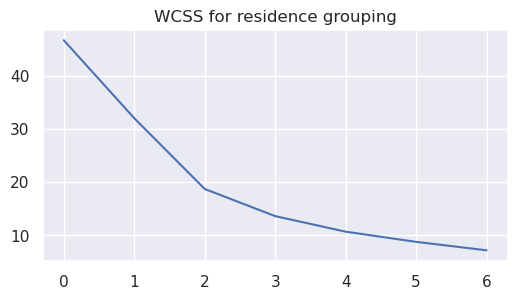

In [142]:
sns.set_theme(rc={'figure.figsize':(6,3)})
sns.lineplot(inertia).set_title('WCSS for residence grouping');

In [143]:
print(inertia)

[46.632990444294585, 31.970147836208454, 18.66637042078363, 13.556804615955217, 10.634607748964623, 8.716402769593612, 7.127021019411606]


In [144]:
np.array(inertia[1:]) - np.array(inertia[:-1])

array([-14.66284261, -13.30377742,  -5.1095658 ,  -2.92219687,
        -1.91820498,  -1.58938175])

In [145]:
respipe.set_params(kmeans__n_clusters=7)
respipe.fit_transform(res_agg)
respipe.named_steps['kmeans'].inertia_

10.634607748964624

In [146]:
respipe.named_steps['kmeans'].labels_

array([2, 3, 2, 1, 6, 0, 3, 2, 0, 0, 5, 2, 2, 2, 2, 4, 6, 0, 2, 0, 1, 2,
       0], dtype=int32)

In [147]:
res_agg['new_cat']= respipe.named_steps['kmeans'].labels_
res_agg

salary_in_usd                                          \
                             mean    min     max            std  quantile   
employee_residence                                                          
AR                   58461.538462  30000   92000   19526.116633   60000.0   
AU                  129733.270833  40000  300000   69510.162748  105600.0   
BR                   60122.476190  19910  115000   27477.643850   54000.0   
CA                  145165.107417  40747  800000   67246.985956  138000.0   
CO                   78846.153846  48000  131000   24942.754973   72000.0   
DE                  104474.453333  16666  275000   58230.655620   86374.0   
EG                  133000.000000  22800  242000   71884.098634   99750.0   
ES                   61843.228571  21593  253750   38467.093711   51128.0   
FR                   99192.673077  28368  323905   66419.247836   74561.5   
GB                   97094.887814  28299  430967   60060.821768   80041.0   
IE                  104694.916667  68293  172309   33896.783252   98585.5   
IN                   49823.689655  15809  200000   38878.171236   37318.5   
IT                   53283.588235  24165   97712   20180.757097   53984.0   
LT                   61942.350000  28666  125333   29630.996479   51999.5   
LV                   57059.687500  34666   86666   20160.276207   46799.5   
MX                  141930.615385  17598  774000  202322.425232   72000.0   
NL                   78516.357143  32390  134960   29664.804546   76677.0   
PL                   81870.333333  18160  209000   55776.004923   65723.5   
PT                   54918.576923  21013  150000   29958.700758   45886.0   
UA                   98272.727273  25000  240000   71246.180121   60000.0   
US                  157203.860440  24000  750000   69592.858923  147500.0   
ZA                   52430.058824  32177  124935   22845.678438   42457.0   
other                74933.142012  15000  417937   58406.827709   56536.0   

                   new_cat  
                            
employee_residence          
AR                       2  
AU                       3  
BR                       2  
CA                       1  
CO                       6  
DE                       0  
EG                       3  
ES                       2  
FR                       0  
GB                       0  
IE                       5  
IN                       2  
IT                       2  
LT                       2  
LV                       2  
MX                       4  
NL                       6  
PL                       0  
PT                       2  
UA                       0  
US                       1  
ZA                       2  
other                    0

In [148]:
res_agg.reset_index().groupby('new_cat')['employee_residence'].apply(list)

new_cat
0             [DE, FR, GB, PL, UA, other]
1                                [CA, US]
2    [AR, BR, ES, IN, IT, LT, LV, PT, ZA]
3                                [AU, EG]
4                                    [MX]
5                                    [IE]
6                                [CO, NL]
Name: employee_residence, dtype: object

In [149]:
filter = {k:v for k,v in zip(res_agg.index,res_agg.new_cat)}

In [150]:
df.employee_residence = df.employee_residence.map(filter)
df.employee_residence.value_counts()

employee_residence
1    8581
0     836
2     258
3      60
6      41
4      13
5      12
Name: count, dtype: int64

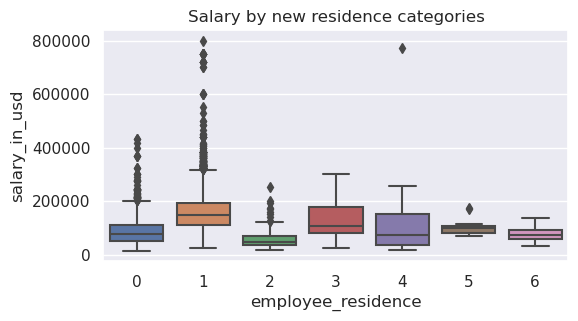

In [151]:
sns.boxplot(df, x='employee_residence', y='salary_in_usd').set_title('Salary by new residence categories');

In [152]:
#df.to_csv('temp_res.csv', index=False)
df.shape

(9801, 8)

<span id='emp' style='font-weight:bold'>employee_type</span>

In [2]:
df = pd.read_csv('temp_res.csv')
df.head(3)

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,MI,FT,9,3,0,0,S,120000
1,MI,FT,9,3,0,0,S,70000
2,MI,CT,9,1,0,4,M,130000


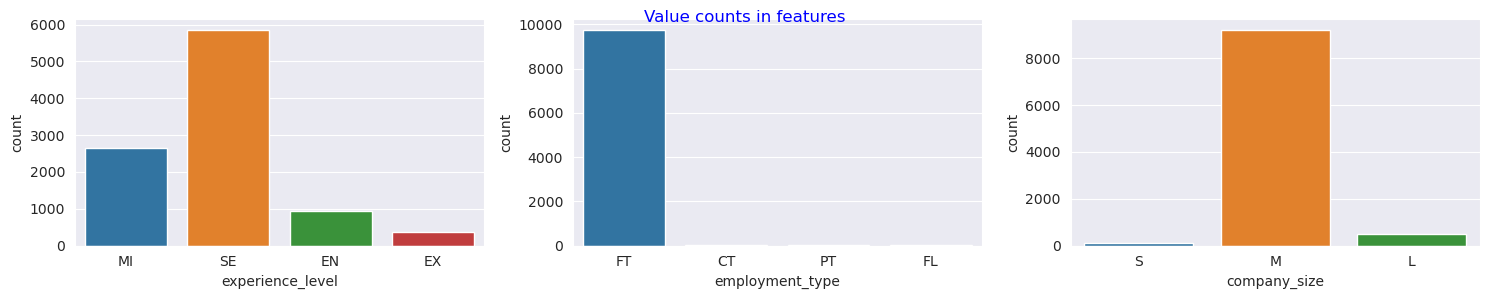

In [4]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
axes = axes.flat

for c, ax in zip(df.select_dtypes('object').columns, axes):
    sns.countplot(data=df, x=c, ax=ax)

plt.tight_layout()
plt.suptitle('Value counts in features', size=12, c='blue')
plt.show()

In [5]:
df.employment_type.value_counts()

employment_type
FT    9737
PT      32
CT      22
FL      10
Name: count, dtype: int64

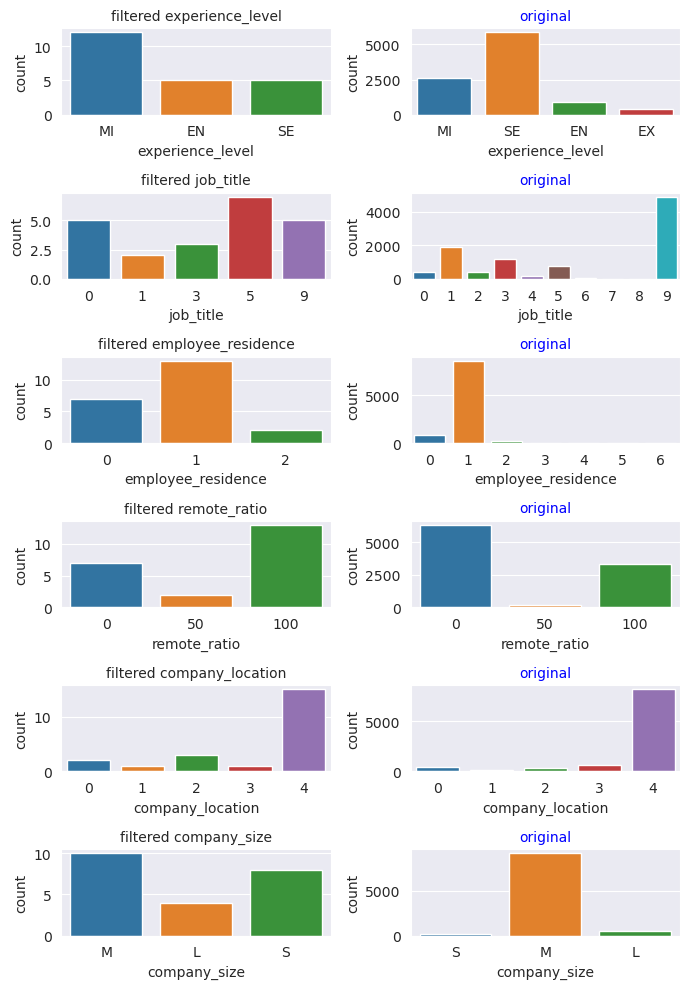

In [27]:
ct = df.loc[df.employment_type == 'CT']
cols  =ct.columns.drop(['employment_type','salary_in_usd'])

fig, ax = plt.subplots(len(cols),2, figsize=(7,10))
ax= ax.flat
n=0
for c in cols:
    sns.countplot(data=ct, x=c, ax=ax[n]).set_title('filtered {}'.format(c), size=10 )
    sns.countplot(data=df, x=c, ax=ax[n+1]).set_title('original', size=10, color='blue')
    n+=2

plt.tight_layout()
plt.show()

In [30]:
t_test(a=['ct', ct.salary_in_usd], b=['original', df.salary_in_usd])
t_test(a=['pt', df.loc[df.employment_type == 'PT','salary_in_usd']], b=['original', df.salary_in_usd])
t_test(a=['fl', df.loc[df.employment_type == 'FL','salary_in_usd']], b=['original', df.salary_in_usd])


The difference between ct and original is significant 
    with p-value of 0.0011867371225710922 (t-score: -3.242998998257071)
The difference between pt and original is significant 
    with p-value of 1.620053232976362e-05 (t-score: -4.313847369310084)
The difference between fl and original is significant 
    with p-value of 1.9402773712545497e-05 (t-score: -4.273751181472327)


<span id='sal' style='font-weight:bold'>salary transformation</span>

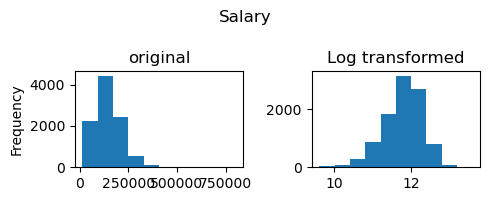

In [14]:
fig, ax = plt.subplots(1,2, figsize=(5,2))

df.salary_in_usd.plot(kind='hist', ax=ax[0], title='original')
plt.hist(np.log(df.salary_in_usd))

ax[1].set_title('Log transformed')

plt.suptitle('Salary')
plt.tight_layout()
plt.show()

In [15]:
df.salary_in_usd = np.log(df.salary_in_usd)

In [17]:
df.to_csv('salary_trans.csv', index=False)